In [24]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [144]:
cen_year = pd.read_excel("cen_year.xlsx", sheet_name = 1)

In [114]:
cen_year.head()

,Up,Down_norm,year_of_pass,maternal
0,4,4,1567,1
1,4,4,1590,1
2,4,4,1616,1
3,4,4,1618,1
4,4,4,1662,1


In [161]:
c = Counter([ tuple(row)[1:3] for row in cen_year.itertuples() ])
up = c[(3,4)]+c[(2,4)]+c[(1,4)]+c[(0,4)]+c[(2,3)]+c[(1,3)]+c[(0,3)]+c[(1,2)]+c[(0,2)]+c[(0,1)]
down = c[(4,3)]+c[(4,2)]+c[(4,1)]+c[(4,0)]+c[(3,2)]+c[(3,1)]+c[(3,0)]+c[(2,1)]+c[(2,0)]+c[(1,0)]
(up-down)/len(cen_year)
(c[(0,4)]+c[(0,3)]+c[(0,2)]+c[(0,1)])/up
(len(cen_year) - up - down)/len(cen_year)

0.5391723318592833

582.7307692307693

In [120]:
len(cen_year) - up - down - c[(1,1)] - c[(2,2)] - c[(3,3)] - c[(4,4)]

7178

In [145]:
year = 1390
years = {}
ratios = {}
passers = {}
kept = {}
marriage = {}
while year <1858:
    period = cen_year[cen_year['year_of_pass'] >= year][cen_year['year_of_pass'] < year + 18]
    c = Counter([ tuple(row)[1:3] for row in period.itertuples() ])
    up = c[(3,4)]+c[(2,4)]+c[(1,4)]+c[(0,4)]+c[(2,3)]+c[(1,3)]+c[(0,3)]+c[(1,2)]+c[(0,2)]+c[(0,1)]
    down = c[(4,3)]+c[(4,2)]+c[(4,1)]+c[(4,0)]+c[(3,2)]+c[(3,1)]+c[(3,0)]+c[(2,1)]+c[(2,0)]+c[(1,0)]
    years[year] = (up-down)/len(period) #up/down #(up-down)/(up+down)
    ratios[year] = (c[(0,4)]+c[(0,3)]+c[(0,2)]+c[(0,1)])/(up)
    passers[year] = len(period)
    kept[year] = (len(period) - up - down)/len(period)
    marriage[year] = period['maternal'].sum()/len(period)
    
    year += 18

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [94]:
years

{1390: 0.04285714285714286,
 1408: 0.027522935779816515,
 1426: -0.10218978102189781,
 1444: -0.2571428571428571,
 1462: -0.28870292887029286,
 1480: -0.3891213389121339,
 1498: -0.2912280701754386,
 1516: -0.23344947735191637,
 1534: -0.26855123674911663,
 1552: -0.36890243902439024,
 1570: -0.3227665706051873,
 1588: -0.32105263157894737,
 1606: -0.4924406047516199,
 1624: -0.4684466019417476,
 1642: -0.5524691358024691,
 1660: -0.5114285714285715,
 1678: -0.5717488789237668,
 1696: -0.6220238095238095,
 1714: -0.6064814814814815,
 1732: -0.6296296296296297,
 1750: -0.6731707317073171,
 1768: -0.7176470588235294,
 1786: -0.6976744186046512,
 1804: -0.7,
 1822: -0.8225108225108225,
 1840: -0.8021978021978022}

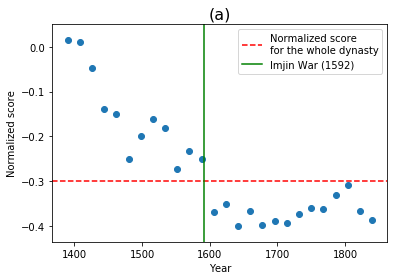

In [177]:
plt.scatter(years.keys(), years.values())
plt.axhline(-0.3, label = "Normalized score\nfor the whole dynasty", c = "red", linestyle = '--')
plt.axvline(1592, label = "Imjin War (1592)", c = "green")
plt.ylabel("Normalized score")
plt.xlabel("Year")
plt.legend(loc = 'best')
plt.title("(a)", fontsize = 16)
plt.show()

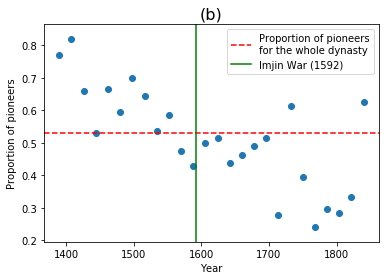

In [178]:
plt.scatter(ratios.keys(), ratios.values())
plt.axhline(0.531, label = "Proportion of pioneers\nfor the whole dynasty", c = "red", linestyle = '--')
plt.axvline(1592, label = "Imjin War (1592)", c = "green")
plt.ylabel("Proportion of pioneers")
plt.xlabel("Year")
plt.legend(loc = 'best')
plt.title("(b)", fontsize = 16)
plt.show()

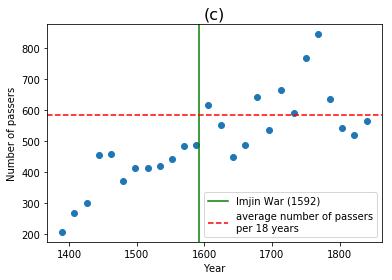

In [179]:
plt.scatter(passers.keys(), passers.values())
plt.axvline(1592, label = "Imjin War (1592)", c = "green")
plt.axhline(len(cen_year)/26, label = "average number of passers\nper 18 years", c = "red", linestyle = '--')
plt.legend(loc = 'best')
plt.xlabel("Year")
plt.ylabel("Number of passers")
plt.title("(c)", fontsize = 16)
plt.show()

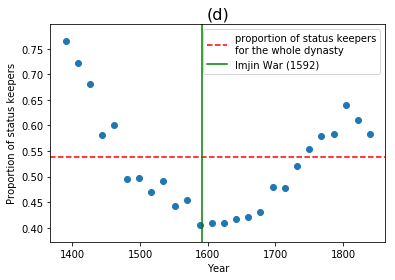

In [180]:
plt.scatter(kept.keys(), kept.values())
plt.axhline(0.539, label = "proportion of status keepers\nfor the whole dynasty", c = "red", linestyle = '--')
plt.axvline(1592, label = "Imjin War (1592)", c = "green")
plt.legend(loc = 'best')
plt.xlabel("Year")
plt.ylabel("Proportion of status keepers")
plt.title("(d)", fontsize = 16)
plt.show()

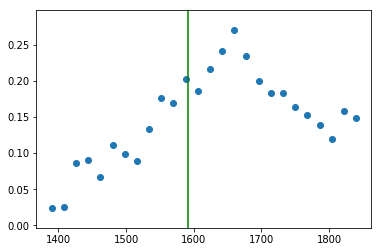

In [150]:
plt.scatter(marriage.keys(), marriage.values())
plt.axvline(1592, label = "Imjin War", c = "green")